# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.__version__

'1.4.2'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [3]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [4]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [5]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [ ]:
len(movies)

### List all Batman movies ever made

In [6]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [10]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [ ]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [33]:
harrypotter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
result = harrypotter_df.sort_values(by=['year'], ascending=False)
result

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [19]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [23]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [31]:
foo = movies[movies.year >= 2000] [movies.year < 2018].sort_values(by=['year'], ascending=True)

/tmp/ipykernel_11281/1134021828.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  foo = movies[movies.year >= 2000] [movies.year < 2018].sort_values(by=['year'], ascending=True)


,title,year
131109,Lost Souls,2000
95039,Nadir,2000
138872,Cast Away,2000
241903,Bhootni,2000
114060,Mone Pore Tomake,2000
...,...,...
96169,Radio Mary,2017
96091,The Chosen Ones,2017
96072,Little Mix: Glory Days,2017
96246,Chi no shio Yamamuro Gunpei haha no negai,2017


### Section I - Q4: How many movies are titled "Hamlet"?

In [36]:
len(movies[movies.title == 'Hamlet'])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [38]:
movies[movies.title == 'Hamlet'] [movies.year >= 2000].sort_values(by=['year'], ascending=True)

/tmp/ipykernel_11281/3501867454.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies[movies.title == 'Hamlet'] [movies.year >= 2000].sort_values(by=['year'], ascending=True)


,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [14]:
cast[cast.title == 'Inception'] [cast.n.isnull()]

/tmp/ipykernel_158547/2912404927.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cast[cast.title == 'Inception'] [cast.n.isnull()]


,title,year,name,type,character,n
98153,Inception,2010,Michael (III) August,actor,LAX Passenger,NaN
197877,Inception,2010,Ken Bhan,actor,Mombasan Gambler,NaN
374661,Inception,2010,John Ceallach,actor,LAX Passenger,NaN
497161,Inception,2010,Garvin Cross,actor,Snow Commander,NaN
684098,Inception,2010,Seve Esposito,actor,Italian Gambler,NaN
690634,Inception,2010,Marcus (II) Everett,actor,Stock Broker,NaN
707642,Inception,2010,Zachary Christopher Fay,actor,Extra,NaN
836295,Inception,2010,Daniel Girondeaud,actor,Bridge Sub Con,NaN
1006636,Inception,2010,Andrew Hoagland,actor,Pedestrian,NaN
1095095,Inception,2010,Charles Jarrell,actor,Hotel Guest,NaN


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [18]:
cast[cast.title == 'Inception'] [~cast.n.isnull()]

/tmp/ipykernel_158547/1216000020.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cast[cast.title == 'Inception'] [~cast.n.isnull()]


,title,year,name,type,character,n
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
260128,Inception,2010,Virgile Bramly,actor,Bridge Sub Con,29.0
326745,Inception,2010,Michael Caine,actor,Miles,11.0
333415,Inception,2010,Earl Cameron,actor,Elderly Bald Man,20.0
433867,Inception,2010,Nicolas Clerc,actor,Bridge Sub Con,26.0
444385,Inception,2010,Adam (IV) Cole,actor,Bar Sub Con,34.0
517227,Inception,2010,Jean-Michel Dagory,actor,Bridge Sub Con,30.0
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
709436,Inception,2010,Russ Fega,actor,Cab Driver,23.0


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [21]:
cast[cast.title == 'Inception'] [~cast.n.isnull()].sort_values(by=['n'], ascending=True).head(10)

/tmp/ipykernel_158547/2269395867.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cast[cast.title == 'Inception'] [~cast.n.isnull()].sort_values(by=['n'], ascending=True).head(10)


,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [9]:
cast[cast.character == 'Albus Dumbledore'].title

704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object

In [32]:
cast[cast.character == 'Albus Dumbledore'].drop_duplicates(['name']).name

704984            Dane Farwell
792421          Michael Gambon
947789          Richard Harris
1685537    George (X) O'Connor
2248085      Timothy Tedmanson
Name: name, dtype: object

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [13]:
len(cast[cast.name == 'Keanu Reeves'])

62

In [12]:
cast[cast.name == 'Keanu Reeves'][cast.n == 1][cast.year >= 1999].sort_values(by=['year'], ascending=True).character

/tmp/ipykernel_10650/2584385803.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cast[cast.name == 'Keanu Reeves'][cast.n == 1][cast.year >= 1999].sort_values(by=['year'], ascending=True).character


1892390                     Neo
1892397             Shane Falco
1892358           Conor O'Neill
1892383             Nelson Moss
1892348        John Constantine
1892388              Alex Wyler
1892382    Detective Tom Ludlow
1892385                  Klaatu
1892359             Henry Torne
1892342                     Kai
1892361               John Wick
1892366                    Evan
1892399                  Ramsey
1892362               John Wick
1892378              Lucas Hill
Name: character, dtype: object

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [14]:
len(cast[cast.year >= 1950][cast.year >= 1950])

/tmp/ipykernel_10650/810296540.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(cast[cast.year >= 1950][cast.year >= 1950])


3254446

In [15]:
len(cast[cast.year >= 2007][cast.year >= 2017])

/tmp/ipykernel_10650/882073248.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(cast[cast.year >= 2007][cast.year >= 2017])


212592

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [20]:
len(cast[cast.year >= 2000][cast.n == 1])

/tmp/ipykernel_10650/2826131257.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(cast[cast.year >= 2000][cast.n == 1])


60568

In [21]:
len(cast[cast.year >= 2000][cast.n > 1])

/tmp/ipykernel_10650/2563981994.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(cast[cast.year >= 2000][cast.n > 1])


1001710

In [24]:
len(cast[cast.year >= 2000][~cast.n.isnull()])

/tmp/ipykernel_10650/2416686712.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(cast[cast.year >= 2000][~cast.n.isnull()])


1062278

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [25]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

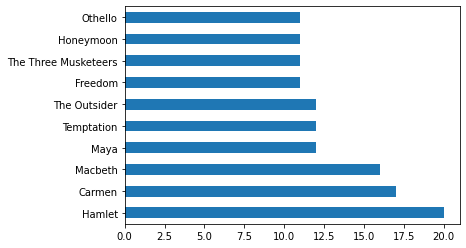

In [26]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [70]:
top3_2000s = movies[movies.year >= 2000].year.value_counts()[:3]
top3_2000s

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [16]:
movies['decade'] = movies['year'].transform(lambda x: int(x / 10) * 10)
movies.sort_values(by=['decade'], ascending=True).decade.value_counts()

2010    75733
2000    39452
1990    22992
1980    21034
1970    19526
1960    17976
1950    12934
1930    10388
1920     9034
1940     8718
1910     6799
2020      285
1900       39
1890        3
2110        1
Name: decade, dtype: int64

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [10]:
top_ten = cast.character.value_counts()[:10]
top_ten

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [12]:
cast[cast.character == 'Herself'].name.value_counts()[:10]

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: name, dtype: int64

In [13]:
cast[cast.character == 'Himself'].name.value_counts()[:10]

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [19]:
cast['zombielist'] = cast['character'].str.startswith('Zombie')
cast[cast.zombielist == True].character.value_counts()[:10]

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [20]:
cast['policelist'] = cast['character'].str.startswith('Police')
cast[cast.policelist == True].character.value_counts()[:10]

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [39]:
# cast[cast.name == 'Keanu Reeves'].sort_values(by=['year'], ascending=True)
cast[cast.name == 'Keanu Reeves']['year'].value_counts()
# plot(kind='barh', x='year',y='f',color = 'Green',label ='f')

2016    5
1988    4
1993    4
2003    3
2017    3
1986    3
2000    3
1999    3
2005    3
1991    3
1996    2
1989    2
1997    2
2001    2
2006    2
1990    2
2008    2
1995    2
2013    2
2018    1
1994    1
2010    1
1985    1
2015    1
2019    1
2014    1
2012    1
1992    1
2009    1
Name: year, dtype: int64

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:xlabel='year', ylabel='n'>

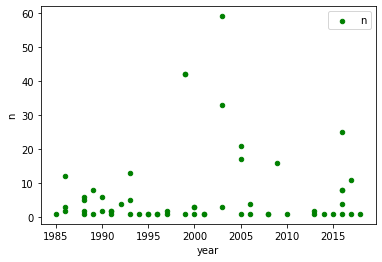

In [34]:
cast[cast.name == 'Keanu Reeves'].plot(kind='scatter', x='year',y='n',color = 'Green',label ='n')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

<AxesSubplot:>

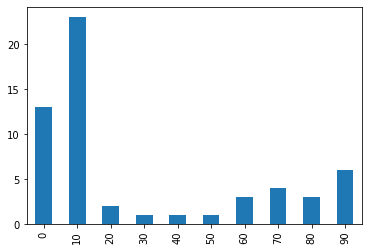

In [33]:
movies['decade'] = movies['year'].transform(lambda x: (int(x / 10) * 10) % 100)
movies[movies.title.str.contains('Hamlet')].decade.value_counts().sort_index().plot(kind='bar')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [42]:
cast[(cast.n == 1) & (cast.year >= 1960) & (cast.year <= 1969)].n.value_counts()

1.0    11823
Name: n, dtype: int64

In [43]:
cast[(cast.n == 1) & (cast.year >= 2000) & (cast.year <= 2009)].n.value_counts()

1.0    26344
Name: n, dtype: int64

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [67]:
cast[(cast.name == 'Frank Oz') & (cast.duplicated('title', keep=False) == True)].drop_duplicates('title').sort_values(by=['year'], ascending=True).title

1723645                                  The Muppet Movie
1723628                                The Blues Brothers
1723621    Star Wars: Episode V - The Empire Strikes Back
1723598                    An American Werewolf in London
1723632                            The Great Muppet Caper
1723629                                  The Dark Crystal
1723660                                    Trading Places
1723624                                      Superman III
1723622        Star Wars: Episode VI - Return of the Jedi
1723653                        The Muppets Take Manhattan
1723601                                  Follow That Bird
1723617                                     Spies Like Us
1723606                                         Labyrinth
1723604                                    Innocent Blood
1723638                        The Muppet Christmas Carol
1723608                            Muppet Treasure Island
1723600                               Blues Brothers 2000
1723612       

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [68]:
cast[(cast.name == 'Frank Oz') & (cast.duplicated('character', keep=False) == True)].drop_duplicates('character').sort_values(by=['year'], ascending=True).character

1723652         Motorcycle Guy
1723649       Doc Hopper's Men
1723650           Marvin Suggs
1723628    Corrections Officer
1723637           Swedish Chef
1723598            Mr. Collins
1723599             Miss Piggy
1723636                 Gramps
1723660            Corrupt Cop
1723624          Brain Surgeon
1723654                 Fozzie
1723602                   Bert
1723601         Cookie Monster
1723617           Test Monitor
1723603                 Grover
1723606            The Wiseman
1723604            Pathologist
1723611                 Animal
1723610          Sam the Eagle
1723609            Fozzie Bear
1723600                 Warden
1723618                   Yoda
1723607                 Fungus
1723661                  Robot
Name: character, dtype: object

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

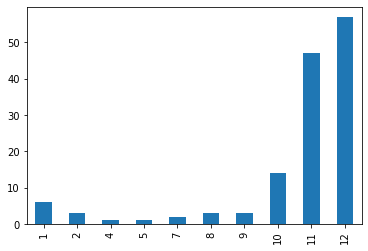

In [53]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

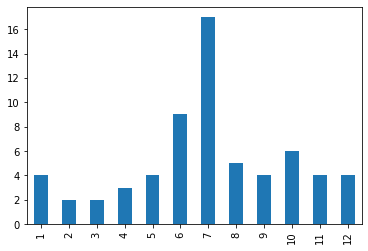

In [54]:
christmas = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

/tmp/ipykernel_16809/1009130375.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  christmas.date.dt.week.value_counts().sort_index().plot(kind='bar')


<AxesSubplot:>

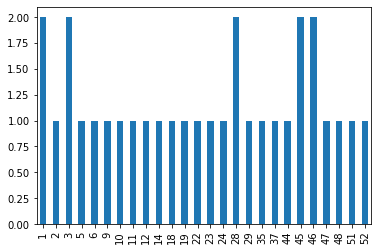

In [55]:
christmas = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
christmas.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!month

In [21]:
merged_df = cast.merge(release_dates, how='right')
final_df = merged_df[merged_df.name == 'Keanu Reeves'] [merged_df.n == 1][merged_df.country == 'USA']
final_df[['title', 'date']].sort_values(by=['date'])

/tmp/ipykernel_12290/4274818504.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_df = merged_df[merged_df.name == 'Keanu Reeves'] [merged_df.n == 1][merged_df.country == 'USA']


,title,date
16636519,The Night Before,1988-04-15
1979325,Bill & Ted's Excellent Adventure,1989-02-17
1978790,Bill & Ted's Bogus Journey,1991-07-19
8779561,Little Buddha,1994-05-25
13396106,Speed,1994-06-10
7578660,Johnny Mnemonic,1995-05-26
507868,A Walk in the Clouds,1995-08-11
2823128,Chain Reaction,1996-08-02
4917071,Feeling Minnesota,1996-09-13
15129866,The Devil's Advocate,1997-10-17


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:>

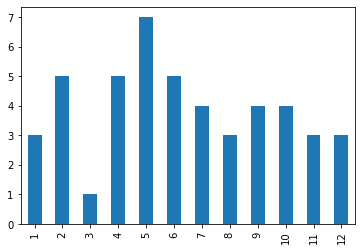

In [26]:
merged_df = cast.merge(release_dates, how='right')
final_df = merged_df[(merged_df.name == 'Keanu Reeves') & (merged_df.country == 'USA')]
final_df.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:>

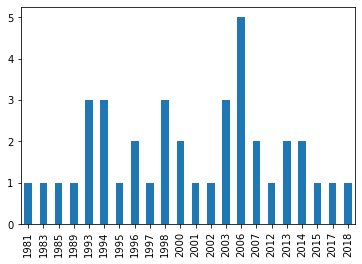

In [27]:
merged_df = cast.merge(release_dates, how='right')
final_df = merged_df[(merged_df.name == 'Ian McKellen') & (merged_df.country == 'USA')]
final_df.date.dt.year.value_counts().sort_index().plot(kind='bar')